## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Read data

In [2]:
sample = pd.read_csv('../data/sample_sub_reg.csv', index_col='Id')
train = pd.read_csv('../data/train.csv', index_col='Id')
test = pd.read_csv('../data/test.csv', index_col='Id')

In [3]:
print("No. of columns in train: {}".format(len(train.columns)))
print("No. of columns in test: {}".format(len(test.columns)))
set(train.columns).symmetric_difference(set(test.columns))

No. of columns in train: 80
No. of columns in test: 79


{'SalePrice'}

train and train data have 80 common columns, but train has one feature more than train. That feature is SalePrice.

## EDA - train data

### Features with null values

In [4]:
train.shape

(2051, 80)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 80 columns):
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         2051 non-null object
Roof Matl          2

In [6]:
train.isnull().sum()[train.isnull().sum() > 0]

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

In [7]:
train.isnull().sum()[train.isnull().sum() > 0].index.tolist()

['Lot Frontage',
 'Alley',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond',
 'Pool QC',
 'Fence',
 'Misc Feature']

In [8]:
discrete_features = ['Year Built', 'Year Remod/Add', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
           'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars',
            'Mo Sold', 'Yr Sold']

continuous_features = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
                       'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
                       'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
                       '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val']

nominal_features = ['PID', 'MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config',
                    'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style',
                    'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating',
                    'Central Air', 'Garage Type', 'Misc Feature', 'Sale Type']

ordinal_features = ['Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual',
                    'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
                    'Heating QC', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish',
                    'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence'
                   ]

len(discrete_features), len(continuous_features), len(nominal_features), len(ordinal_features)

(14, 19, 23, 23)

### Discrete Features

**Year Built**

In [9]:
train['Year Built'].dtype

dtype('int64')

In [10]:
sorted(train['Year Built'].value_counts(dropna=False).index.tolist())

[1872,
 1875,
 1879,
 1880,
 1885,
 1890,
 1892,
 1893,
 1895,
 1896,
 1898,
 1900,
 1901,
 1905,
 1908,
 1910,
 1911,
 1912,
 1913,
 1914,
 1915,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010]

In [11]:
train['Year Built'].value_counts(dropna=False).sort_index()

1872     1
1875     1
1879     1
1880     3
1885     1
        ..
2006    99
2007    78
2008    36
2009    14
2010     1
Name: Year Built, Length: 113, dtype: int64

In [12]:
indices = train['Year Built'].value_counts(dropna=False).sort_index().index
values = train['Year Built'].value_counts(dropna=False).sort_index().values

In [13]:
# plt.figure(figsize=(10, 8))
# plt.bar(indices, values)

# plt.xlabel('Year Built')
# plt.ylabel('')

Text(0, 0.5, 'Count')

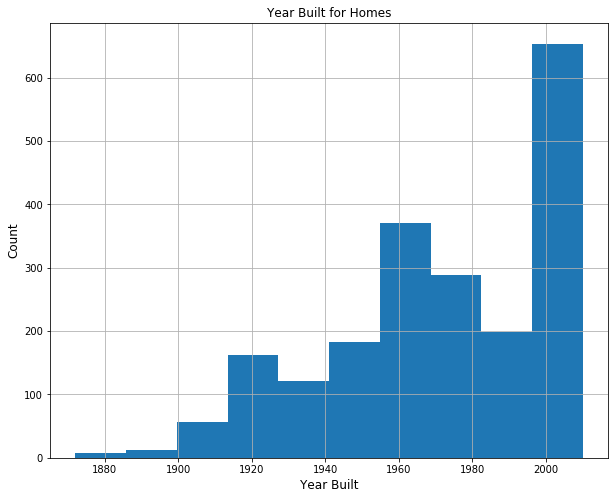

In [14]:
plt.figure(figsize=(10, 8))
train['Year Built'].hist()

plt.title('Year Built for Homes', fontsize=12)
plt.xlabel('Year Built', fontsize=12)
plt.ylabel('Count', fontsize=12)

Observation: Non-normal distribution which is left-skewed

**Year Remod/Add**

In [15]:
train['Year Remod/Add'].dtype

dtype('int64')

In [16]:
sorted(train['Year Remod/Add'].value_counts(dropna=False).index.tolist())

[1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010]

Text(0, 0.5, 'Count')

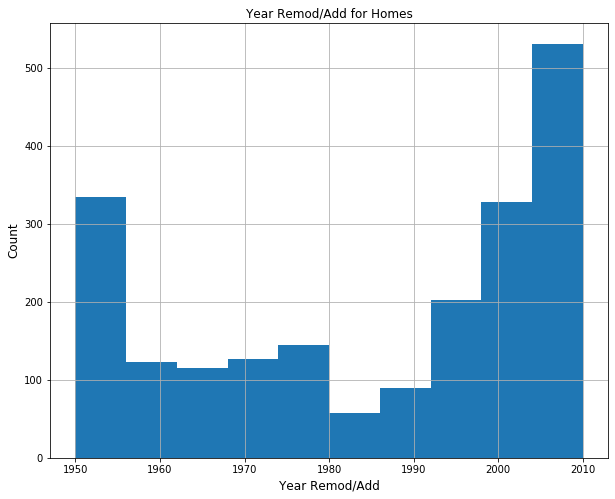

In [17]:
plt.figure(figsize=(10, 8))
train['Year Remod/Add'].hist()

plt.title('Year Remod/Add for Homes', fontsize=12)
plt.xlabel('Year Remod/Add', fontsize=12)
plt.ylabel('Count', fontsize=12)

Observation: Non-normal distribution with two modes

**Bsmt Full Bath**

In [18]:
train['Bsmt Full Bath'].dtype

dtype('float64')

In [19]:
train['Bsmt Full Bath'].value_counts(dropna=False)

0.0    1200
1.0     824
2.0      23
3.0       2
NaN       2
Name: Bsmt Full Bath, dtype: int64

In [20]:
train['Bsmt Full Bath'] = train['Bsmt Full Bath'].astype('Int64')

In [21]:
train['Bsmt Full Bath'].value_counts(dropna=False).sort_index()

0      1200
1       824
2        23
3         2
NaN       2
Name: Bsmt Full Bath, dtype: int64

In [22]:
idx = train['Bsmt Full Bath'].value_counts().sort_index().index
val = train['Bsmt Full Bath'].value_counts().sort_index().values

Text(0, 0.5, 'Count')

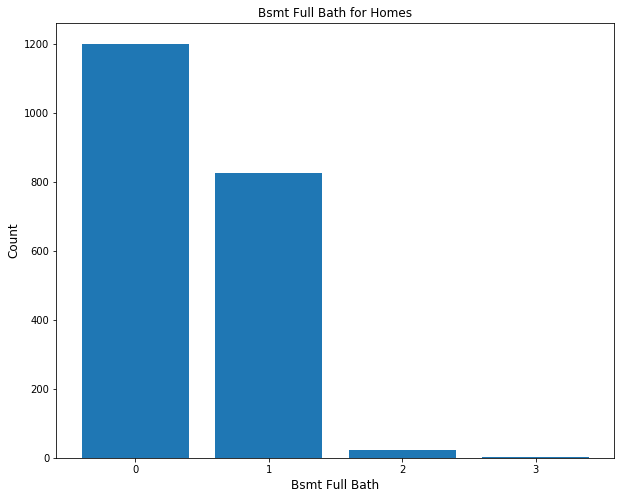

In [23]:
plt.figure(figsize=(10, 8))
plt.bar(idx, val)

plt.title('Bsmt Full Bath for Homes', fontsize=12)
plt.xlabel('Bsmt Full Bath', fontsize=12)
plt.xticks([i for i in range(len(idx))], idx)
plt.ylabel('Count', fontsize=12)

Observation: In decreasing order of counts of Bsmt Full Bath: 0, 1, 2, 3

**Bsmt Half Bath**

In [24]:
train['Bsmt Half Bath'].dtype

dtype('float64')

In [25]:
train['Bsmt Half Bath'].value_counts(dropna=False)

0.0    1923
1.0     122
2.0       4
NaN       2
Name: Bsmt Half Bath, dtype: int64

In [26]:
train['Bsmt Half Bath'] = train['Bsmt Half Bath'].astype('Int64')

In [27]:
train['Bsmt Half Bath'].value_counts(dropna=False).sort_index()

0      1923
1       122
2         4
NaN       2
Name: Bsmt Half Bath, dtype: int64

In [28]:
idx = train['Bsmt Half Bath'].value_counts().sort_index().index
val = train['Bsmt Half Bath'].value_counts().sort_index().values

Text(0, 0.5, 'Count')

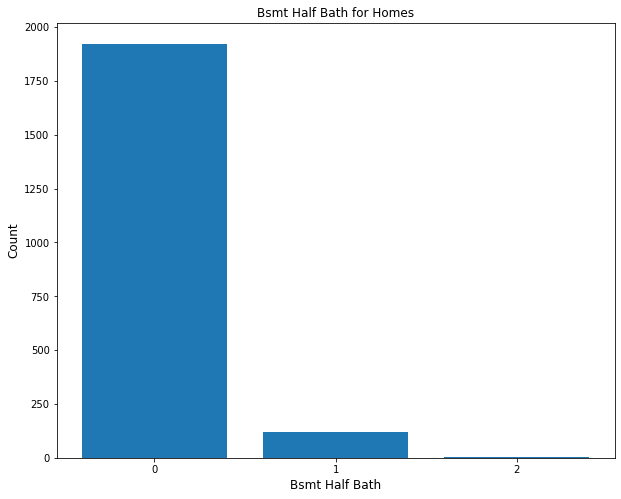

In [29]:
plt.figure(figsize=(10, 8))
plt.bar(idx, val)

plt.title('Bsmt Half Bath for Homes', fontsize=12)
plt.xlabel('Bsmt Half Bath', fontsize=12)
plt.xticks([i for i in range(len(idx))], idx)
plt.ylabel('Count', fontsize=12)

Observation: In decreasing order of counts of Bsmt Half Bath: 0, 1, 2, 3

**Full Bath**

In [30]:
train['Full Bath'].dtype

dtype('int64')

In [31]:
train['Full Bath'].value_counts(dropna=False).sort_index()

0       8
1     900
2    1096
3      45
4       2
Name: Full Bath, dtype: int64

In [32]:
idx = train['Full Bath'].value_counts().sort_index().index
val = train['Full Bath'].value_counts().sort_index().values

Text(0, 0.5, 'Count')

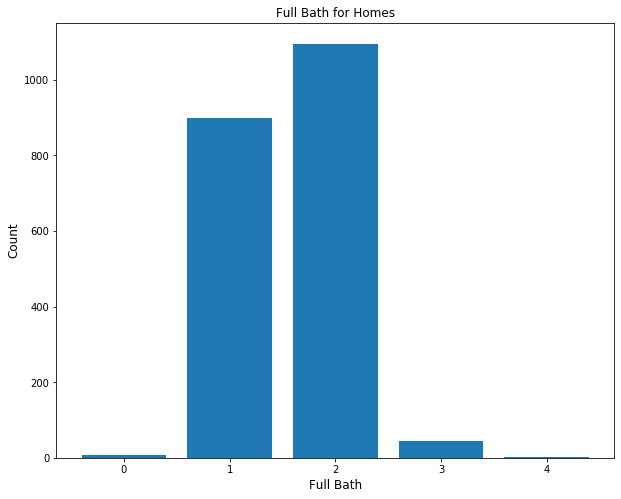

In [33]:
plt.figure(figsize=(10, 8))
plt.bar(idx, val)

plt.title('Full Bath for Homes', fontsize=12)
plt.xlabel('Full Bath', fontsize=12)
plt.xticks([i for i in range(len(idx))], idx)
plt.ylabel('Count', fontsize=12)

Observation: In decreasing order of counts of Full Bath: 2, 1, 3, 0, 4

**Half Bath**

In [34]:
train['Half Bath'].dtype

dtype('int64')

In [35]:
train['Half Bath'].value_counts(dropna=False)

0    1308
1     725
2      18
Name: Half Bath, dtype: int64

In [36]:
idx = train['Half Bath'].value_counts().sort_index().index
val = train['Half Bath'].value_counts().sort_index().values

Text(0, 0.5, 'Count')

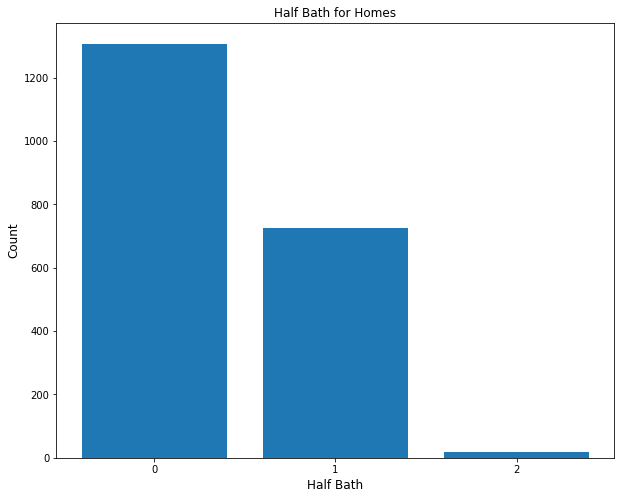

In [37]:
plt.figure(figsize=(10, 8))
plt.bar(idx, val)

plt.title('Half Bath for Homes', fontsize=12)
plt.xlabel('Half Bath', fontsize=12)
plt.xticks([i for i in range(len(idx))], idx)
plt.ylabel('Count', fontsize=12)

Observation: In decreasing order of counts of Half Bath: 0, 1, 2

**Bedroom AbvGr**

In [38]:
train['Bedroom AbvGr'].dtype

dtype('int64')

In [39]:
train['Bedroom AbvGr'].value_counts(dropna=False).sort_index()

0       5
1      75
2     544
3    1108
4     265
5      41
6      12
8       1
Name: Bedroom AbvGr, dtype: int64

In [40]:
idx = train['Bedroom AbvGr'].value_counts().sort_index().index
val = train['Bedroom AbvGr'].value_counts().sort_index().values

Text(0, 0.5, 'Count')

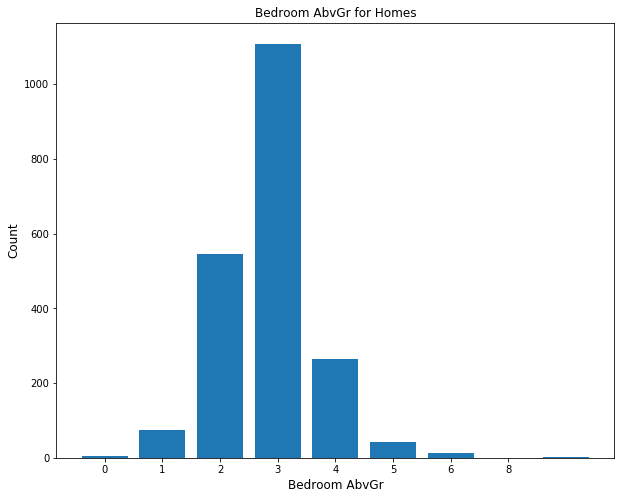

In [41]:
plt.figure(figsize=(10, 8))
plt.bar(idx, val)

plt.title('Bedroom AbvGr for Homes', fontsize=12)
plt.xlabel('Bedroom AbvGr', fontsize=12)
plt.xticks([i for i in range(len(idx))], idx)
plt.ylabel('Count', fontsize=12)

Observation: In decreasing order of counts of Bedroom AbvGr: 3, 2, 4, 1, 5, 6, 0, 8

**Kitchen AbvGr**

In [42]:
train['Kitchen AbvGr'].dtype

dtype('int64')

In [43]:
train['Kitchen AbvGr'].value_counts(dropna=False).sort_index()

0       2
1    1960
2      88
3       1
Name: Kitchen AbvGr, dtype: int64

In [44]:
idx = train['Kitchen AbvGr'].value_counts().sort_index().index
val = train['Kitchen AbvGr'].value_counts().sort_index().values

Text(0, 0.5, 'Count')

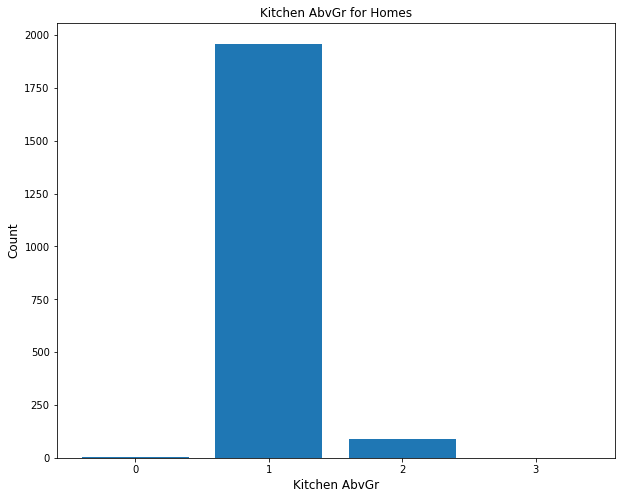

In [45]:
plt.figure(figsize=(10, 8))
plt.bar(idx, val)

plt.title('Kitchen AbvGr for Homes', fontsize=12)
plt.xlabel('Kitchen AbvGr', fontsize=12)
plt.xticks([i for i in range(len(idx))], idx)
plt.ylabel('Count', fontsize=12)

Observation: In decreasing order of counts of Kitchen AbvGr: 1, 2, 0, 3

**TotRms AbvGrd**

In [46]:
train['TotRms AbvGrd'].dtype

dtype('int64')

In [47]:
train['TotRms AbvGrd'].value_counts(dropna=False).sort_index()

2       1
3      12
4     146
5     407
6     597
7     475
8     228
9      98
10     49
11     22
12     13
13      1
14      1
15      1
Name: TotRms AbvGrd, dtype: int64

In [48]:
idx = train['TotRms AbvGrd'].value_counts().sort_index().index
val = train['TotRms AbvGrd'].value_counts().sort_index().values

Text(0, 0.5, 'Count')

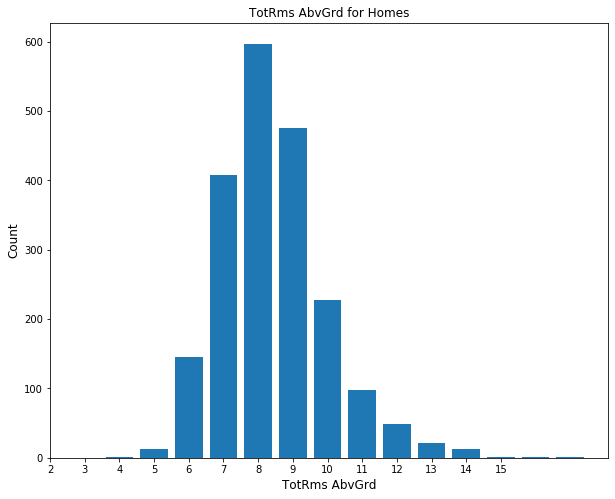

In [49]:
plt.figure(figsize=(10, 8))
plt.bar(idx, val)

plt.title('TotRms AbvGrd for Homes', fontsize=12)
plt.xlabel('TotRms AbvGrd', fontsize=12)
plt.xticks([i for i in range(len(idx))], idx)
plt.ylabel('Count', fontsize=12)

Observation: In decreasing order of counts of TotRms AbvGrd: 15, 14, 13, 2, 3, 12, 11, 10, 9, 4, 8, 5, 7, 6

**Fireplaces**

In [50]:
train['Fireplaces'].dtype

dtype('int64')

In [51]:
train['Fireplaces'].value_counts(dropna=False)

0    1000
1     898
2     146
3       6
4       1
Name: Fireplaces, dtype: int64

In [52]:
idx = train['Fireplaces'].value_counts().sort_index().index
val = train['Fireplaces'].value_counts().sort_index().values

Text(0, 0.5, 'Count')

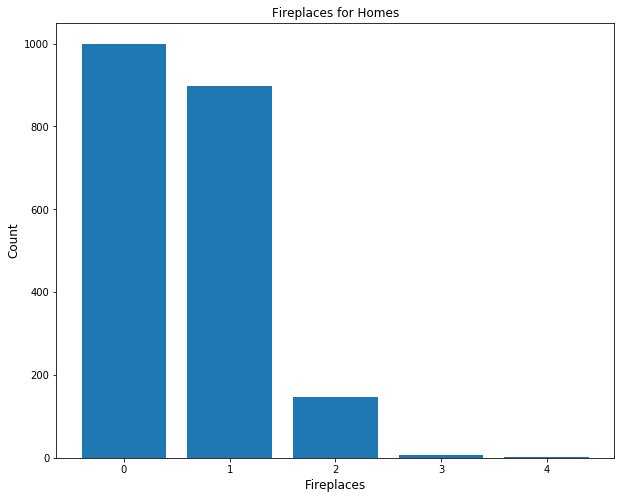

In [53]:
plt.figure(figsize=(10, 8))
plt.bar(idx, val)

plt.title('Fireplaces for Homes', fontsize=12)
plt.xlabel('Fireplaces', fontsize=12)
plt.xticks([i for i in range(len(idx))], idx)
plt.ylabel('Count', fontsize=12)

Observation: In decreasing order of counts of Fireplaces: 0, 1, 2, 3, 4

**Garage Yr Blt**

In [54]:
train['Garage Yr Blt'].dtype

dtype('float64')

In [55]:
train['Garage Yr Blt'].value_counts(dropna=False).sort_index()

1895.0      1
1896.0      1
1900.0      3
1910.0      5
1914.0      2
         ... 
2008.0     44
2009.0     17
2010.0      2
2207.0      1
NaN       114
Name: Garage Yr Blt, Length: 101, dtype: int64

In [56]:
train['Garage Yr Blt'] = train['Garage Yr Blt'].astype('Int64')

In [57]:
train['Garage Yr Blt'].value_counts(dropna=False).sort_index()

1895.0      1
1896.0      1
1900.0      3
1910.0      5
1914.0      2
         ... 
2008.0     44
2009.0     17
2010.0      2
2207.0      1
NaN       114
Name: Garage Yr Blt, Length: 101, dtype: int64

Handling possibly erroneous data

In [58]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(train.loc[train['Garage Yr Blt'] == 2207, :])

            PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
Id                                                                            
2261  916384070           20        RL          68.0      8298   Pave   NaN   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
Id                                                                         
2261       IR1          HLS    AllPub     Inside        Gtl       Timber   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
Id                                                                 
2261        Norm        Norm      1Fam      1Story             8   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
Id                                                                    
2261             5        2006            2007        Hip   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
Id                                        

In [59]:
train.loc[train['Garage Yr Blt'] == 2207, 'Garage Yr Blt']

Id
2261    2207
Name: Garage Yr Blt, dtype: Int64

In [60]:
train.loc[train['Garage Yr Blt'] == 2207, 'Garage Yr Blt'] = 2007

In [61]:
train.loc[2261, 'Garage Yr Blt']

2007

In [62]:
garage_yr_blt_missing_idx = train.loc[train['Garage Yr Blt'].isnull()].index.tolist()

In [63]:
print(sorted(garage_yr_blt_missing_idx))

[28, 120, 130, 131, 172, 187, 204, 207, 216, 218, 281, 325, 330, 393, 536, 615, 698, 701, 710, 727, 728, 753, 754, 763, 764, 766, 781, 853, 894, 898, 900, 943, 1132, 1135, 1221, 1260, 1278, 1292, 1296, 1299, 1306, 1318, 1319, 1332, 1366, 1370, 1376, 1415, 1417, 1486, 1487, 1492, 1501, 1502, 1503, 1504, 1505, 1514, 1515, 1516, 1521, 1547, 1550, 1591, 1600, 1601, 1807, 1808, 1902, 1903, 1948, 1951, 1968, 2034, 2046, 2083, 2084, 2127, 2174, 2187, 2195, 2235, 2237, 2243, 2278, 2288, 2290, 2369, 2471, 2496, 2556, 2621, 2628, 2635, 2668, 2670, 2671, 2690, 2693, 2697, 2745, 2820, 2821, 2824, 2837, 2842, 2846, 2853, 2875, 2880, 2882, 2883, 2914, 2920]


**Garage Cars**

In [64]:
train['Garage Cars'].dtype

dtype('float64')

In [65]:
train['Garage Cars'].value_counts(dropna=False).sort_index()

0.0     113
1.0     524
2.0    1136
3.0     263
4.0      13
5.0       1
NaN       1
Name: Garage Cars, dtype: int64

In [66]:
train['Garage Cars'] = train['Garage Cars'].astype('Int64')

In [67]:
train['Garage Cars'].value_counts(dropna=False).sort_index()

0       113
1       524
2      1136
3       263
4        13
5         1
NaN       1
Name: Garage Cars, dtype: int64

In [68]:
train[train['Garage Cars'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2237,910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


**Mo Sold**

In [69]:
train['Mo Sold'].dtype

dtype('int64')

In [70]:
train['Mo Sold'].value_counts(dropna=False).sort_index()

1      79
2     104
3     168
4     208
5     257
6     352
7     303
8     167
9     109
10    123
11    103
12     78
Name: Mo Sold, dtype: int64

In [71]:
def get_nominal_value_str(value_int):
    value_str = str(value_int)
    if len(value_str) == 1:
        return "0" + value_str
    else:
        return value_str

train['Mo Sold'] = train['Mo Sold'].map(get_nominal_value_str)
train['Mo Sold'] = pd.Categorical(train['Mo Sold']) 

In [72]:
train['Mo Sold'].map(get_nominal_value_str).value_counts(dropna=False).sort_index()

01     79
02    104
03    168
04    208
05    257
06    352
07    303
08    167
09    109
10    123
11    103
12     78
Name: Mo Sold, dtype: int64

**Yr Sold**

In [73]:
train['Yr Sold'].dtype

dtype('int64')

In [74]:
train['Yr Sold'].value_counts(dropna=False).sort_index()

2006    438
2007    498
2008    435
2009    446
2010    234
Name: Yr Sold, dtype: int64

In [75]:
train['Yr Sold'] = pd.Categorical(train['Yr Sold'])

### Continuous Features

In [76]:
continuous_features = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
                       'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
                       'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
                       '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val']

**Lot Frontage**

In [77]:
train['Lot Frontage'].dtype

dtype('float64')

**Lot Area**

In [78]:
train['Lot Area'].dtype

dtype('int64')

In [79]:
train['Lot Area'] = train['Lot Area'].astype('float')

In [80]:
train['Lot Area'][train['Lot Area'].isnull()]

Series([], Name: Lot Area, dtype: float64)

**Mas Vnr Area**

In [81]:
train['Mas Vnr Area'].dtype

dtype('float64')

**BsmtFin SF 1**

In [82]:
train['BsmtFin SF 1'].dtype

dtype('float64')

In [83]:
train['BsmtFin SF 1'][train['BsmtFin SF 1'].isnull()]

Id
1342   NaN
Name: BsmtFin SF 1, dtype: float64

**BsmtFin SF 2**

In [84]:
train['BsmtFin SF 2'].dtype

dtype('float64')

In [85]:
train['BsmtFin SF 2'][train['BsmtFin SF 2'].isnull()]

Id
1342   NaN
Name: BsmtFin SF 2, dtype: float64

**Bsmt Unf SF**

In [86]:
train['Bsmt Unf SF'].dtype

dtype('float64')

In [87]:
train['Bsmt Unf SF'][train['Bsmt Unf SF'].isnull()]

Id
1342   NaN
Name: Bsmt Unf SF, dtype: float64

**Total Bsmt SF**

In [88]:
train['Total Bsmt SF'].dtype

dtype('float64')

In [89]:
train['Total Bsmt SF'][train['Total Bsmt SF'].isnull()]

Id
1342   NaN
Name: Total Bsmt SF, dtype: float64

**1st Flr SF**

In [90]:
train['1st Flr SF'] = train['1st Flr SF'].astype('float')

In [91]:
train['1st Flr SF'][train['1st Flr SF'].isnull()]

Series([], Name: 1st Flr SF, dtype: float64)

**2nd Flr SF**

In [92]:
train['2nd Flr SF'] = train['2nd Flr SF'].astype('float')

In [93]:
train['2nd Flr SF'][train['2nd Flr SF'].isnull()]

Series([], Name: 2nd Flr SF, dtype: float64)

**Low Qual Fin SF**

In [94]:
train['Low Qual Fin SF'] = train['Low Qual Fin SF'].astype('float')

In [95]:
train['Low Qual Fin SF'][train['Low Qual Fin SF'].isnull()]

Series([], Name: Low Qual Fin SF, dtype: float64)

**Gr Liv Area**

In [96]:
train['Gr Liv Area'] = train['Gr Liv Area'].astype('float')

In [97]:
train['Gr Liv Area'][train['Gr Liv Area'].isnull()]

Series([], Name: Gr Liv Area, dtype: float64)

**Garage Area**

In [98]:
train['Garage Area'].dtype

dtype('float64')

In [99]:
garage_area_missing_idx = train[train['Garage Area'].isnull()].index.tolist()

**Wood Deck SF**

In [100]:
train['Wood Deck SF'].dtype

dtype('int64')

In [101]:
train['Wood Deck SF'] = train['Wood Deck SF'].astype('float')

In [102]:
train['Wood Deck SF'][train['Wood Deck SF'].isnull()]

Series([], Name: Wood Deck SF, dtype: float64)

**Open Porch SF**

In [103]:
train['Open Porch SF'].dtype

dtype('int64')

In [104]:
train['Open Porch SF'] = train['Open Porch SF'].astype('float')

In [105]:
train['Open Porch SF'][train['Open Porch SF'].isnull()]

Series([], Name: Open Porch SF, dtype: float64)

**Enclosed Porch**

In [106]:
train['Enclosed Porch'].dtype

dtype('int64')

In [107]:
train['Enclosed Porch'] = train['Enclosed Porch'].astype('float')

In [108]:
train['Enclosed Porch'][train['Enclosed Porch'].isnull()]

Series([], Name: Enclosed Porch, dtype: float64)

**3Ssn Porch**

In [109]:
train['3Ssn Porch'].dtype

dtype('int64')

In [110]:
train['3Ssn Porch'] = train['3Ssn Porch'].astype('float')

In [111]:
train['3Ssn Porch'][train['3Ssn Porch'].isnull()]

Series([], Name: 3Ssn Porch, dtype: float64)

**Screen Porch**

In [112]:
train['Screen Porch'].dtype

dtype('int64')

In [113]:
train['Screen Porch'] = train['Screen Porch'].astype('float')

In [114]:
train['Screen Porch'][train['Screen Porch'].isnull()]

Series([], Name: Screen Porch, dtype: float64)

**Pool Area**

In [115]:
train['Pool Area'].dtype

dtype('int64')

In [116]:
train['Pool Area'] = train['Screen Porch'].astype('float')

In [117]:
train['Pool Area'][train['Pool Area'].isnull()]

Series([], Name: Pool Area, dtype: float64)

**Misc Val**

In [118]:
train['Misc Val'].dtype

dtype('int64')

In [119]:
train['Misc Val'] = train['Misc Val'].astype('float')

In [120]:
train['Misc Val'][train['Misc Val'].isnull()]

Series([], Name: Misc Val, dtype: float64)

### Nominal Features

In [121]:
nominal_features = ['PID', 'MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config',
                    'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style',
                    'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating',
                    'Central Air', 'Garage Type', 'Misc Feature', 'Sale Type']

**PID**

In [122]:
train['PID'].dtype

dtype('int64')

In [123]:
train['PID'][train['PID'].isnull()]

Series([], Name: PID, dtype: int64)

In [124]:
train['PID'] = pd.Categorical(train['PID'])

**MS SubClass**

In [125]:
train['MS SubClass'].value_counts(dropna=False).sort_index()

20     770
30     101
40       4
45      11
50     198
60     394
70      90
75      16
80      86
85      28
90      75
120    132
150      1
160     88
180     11
190     46
Name: MS SubClass, dtype: int64

In [126]:
train['MS SubClass'].dtype

dtype('int64')

In [127]:
def get_nominal_value_str(value_int):
    value_str = str(value_int)
    if len(value_str) == 2:
        return "0" + value_str
    elif len(value_str) == 3:
        return value_str
    
train['MS SubClass'] = train['MS SubClass'].map(get_nominal_value_str)
train['MS SubClass'] = pd.Categorical(train['MS SubClass']) 

In [128]:
train['MS SubClass'].value_counts(dropna=False).sort_index()

020    770
030    101
040      4
045     11
050    198
060    394
070     90
075     16
080     86
085     28
090     75
120    132
150      1
160     88
180     11
190     46
Name: MS SubClass, dtype: int64

**MS Zoning**

In [129]:
train['MS Zoning'].value_counts(dropna=False).sort_index()

A (agr)       2
C (all)      19
FV          101
I (all)       1
RH           14
RL         1598
RM          316
Name: MS Zoning, dtype: int64

In [130]:
train['MS Zoning'] = pd.Categorical(train['MS Zoning'])

In [131]:
train['MS Zoning'].dtype

CategoricalDtype(categories=['A (agr)', 'C (all)', 'FV', 'I (all)', 'RH', 'RL', 'RM'], ordered=False)

**Street**

In [132]:
train['Street'].dtype

dtype('O')

In [133]:
train['Street'].value_counts()

Pave    2044
Grvl       7
Name: Street, dtype: int64

In [134]:
train['Street'] = pd.Categorical(train['Street'])

**Alley**

In [135]:
train['Alley'].dtype

dtype('O')

In [136]:
train['Alley'].value_counts(dropna=False)

NaN     1911
Grvl      85
Pave      55
Name: Alley, dtype: int64

Handling missing data

In [137]:
train['Alley'] = train['Alley'].fillna('NoAlley')

In [138]:
train['Alley'] = pd.Categorical(train['Alley'])

**Land Contour**

In [139]:
train['Land Contour'].dtype

dtype('O')

In [140]:
train['Land Contour'].value_counts()

Lvl    1843
HLS      85
Bnk      80
Low      43
Name: Land Contour, dtype: int64

In [141]:
train['Land Contour'] = pd.Categorical(train['Land Contour'])

**Lot Config**

In [142]:
train['Lot Config'].dtype

dtype('O')

In [143]:
train['Lot Config'].value_counts()

Inside     1503
Corner      348
CulDSac     131
FR2          60
FR3           9
Name: Lot Config, dtype: int64

In [144]:
train['Lot Config'] = pd.Categorical(train['Lot Config'])

**Neighborhood**

In [145]:
train['Neighborhood'].dtype

dtype('O')

In [146]:
train['Neighborhood'].value_counts()

NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
SawyerW     87
NWAmes      87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
Timber      48
NoRidge     48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
NPkVill     17
Veenker     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [147]:
train['Neighborhood'] = pd.Categorical(train['Neighborhood'])

**Condition 1**

In [148]:
train['Condition 1'].dtype

dtype('O')

In [149]:
train['Condition 1'].value_counts()

Norm      1767
Feedr      109
Artery      70
RRAn        36
PosN        27
RRAe        21
PosA        12
RRNn         6
RRNe         3
Name: Condition 1, dtype: int64

In [150]:
train['Condition 1'] = pd.Categorical(train['Condition 1'])

**Condition 2**

In [151]:
train['Condition 2'].value_counts()

Norm      2025
Feedr       11
Artery       5
PosN         3
PosA         3
RRNn         2
RRAn         1
RRAe         1
Name: Condition 2, dtype: int64

In [152]:
train['Condition 2'] = pd.Categorical(train['Condition 2'])

**Bldg Type**

In [153]:
train['Bldg Type'].value_counts()

1Fam      1700
TwnhsE     161
Duplex      75
Twnhs       69
2fmCon      46
Name: Bldg Type, dtype: int64

In [154]:
train['Bldg Type'] = pd.Categorical(train['Bldg Type'])

**House Style**

In [155]:
train['House Style'].value_counts()

1Story    1059
2Story     598
1.5Fin     218
SLvl        94
SFoyer      50
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: House Style, dtype: int64

In [156]:
train['House Style'] = pd.Categorical(train['House Style'])

**Roof Style**

In [157]:
train['Roof Style'].dtype

dtype('O')

In [158]:
train['Roof Style'].value_counts().sort_index()

Flat         13
Gable      1619
Gambrel      12
Hip         397
Mansard       7
Shed          3
Name: Roof Style, dtype: int64

In [159]:
train['Roof Style'] = pd.Categorical(train['Roof Style'])

**Roof Matl**

In [160]:
train['Roof Matl'].dtype

dtype('O')

In [161]:
train['Roof Matl'].value_counts()

CompShg    2025
Tar&Grv      15
WdShngl       5
WdShake       4
ClyTile       1
Membran       1
Name: Roof Matl, dtype: int64

In [162]:
train['Roof Matl'] = pd.Categorical(train['Roof Matl'])

**Exterior 1st**

In [163]:
train['Exterior 1st'].dtype

dtype('O')

In [164]:
train['Exterior 1st'].value_counts()

VinylSd    724
MetalSd    331
HdBoard    300
Wd Sdng    276
Plywood    152
CemntBd     90
BrkFace     64
WdShing     45
AsbShng     33
Stucco      27
BrkComm      3
Stone        2
CBlock       2
ImStucc      1
AsphShn      1
Name: Exterior 1st, dtype: int64

In [165]:
train['Exterior 1st'] = pd.Categorical(train['Exterior 1st'])

**Exterior 2nd**

In [166]:
train['Exterior 2nd'].dtype

dtype('O')

In [167]:
train['Exterior 2nd'].value_counts()

VinylSd    721
MetalSd    324
HdBoard    275
Wd Sdng    262
Plywood    185
CmentBd     90
Wd Shng     63
BrkFace     34
Stucco      30
AsbShng     28
Brk Cmn     17
ImStucc     11
Stone        6
AsphShn      3
CBlock       2
Name: Exterior 2nd, dtype: int64

In [168]:
train['Exterior 2nd'] = pd.Categorical(train['Exterior 2nd'])

**Mas Vnr Type**

In [169]:
train['Mas Vnr Type'].dtype

dtype('O')

In [170]:
train['Mas Vnr Type'].value_counts(dropna=False).sort_index()

BrkCmn       13
BrkFace     630
None       1218
Stone       168
NaN          22
Name: Mas Vnr Type, dtype: int64

In [171]:
train['Mas Vnr Type'] = pd.Categorical(train['Mas Vnr Type'])

**Foundation**

In [172]:
train['Foundation'].dtype

dtype('O')

In [173]:
train['Foundation'].value_counts(dropna=False)

PConc     926
CBlock    863
BrkTil    221
Slab       34
Stone       5
Wood        2
Name: Foundation, dtype: int64

In [174]:
train['Foundation'] = pd.Categorical(train['Foundation'])

**Heating**

In [175]:
train['Heating'].dtype

dtype('O')

In [176]:
train['Heating'].value_counts(dropna=False).sort_index()

GasA    2018
GasW      20
Grav       5
OthW       2
Wall       6
Name: Heating, dtype: int64

In [177]:
train['Heating'] = pd.Categorical(train['Heating'])

In [178]:
# train['Heating'] = train['Heating'].cat.add_categories(['Floor'])

In [179]:
# train['Heating'].value_counts().sort_index()

**Central Air**

In [180]:
train['Central Air'].value_counts()

Y    1910
N     141
Name: Central Air, dtype: int64

In [181]:
train['Central Air'] = train['Central Air'].map(lambda x: 1 if x == 'Y' else 0)

In [182]:
train['Central Air'].value_counts()

1    1910
0     141
Name: Central Air, dtype: int64

**Garage Type**

In [183]:
train['Garage Type'].dtype

dtype('O')

In [184]:
train['Garage Type'].value_counts(dropna=False).sort_index()

2Types       19
Attchd     1213
Basment      27
BuiltIn     132
CarPort      11
Detchd      536
NaN         113
Name: Garage Type, dtype: int64

In [185]:
garage_type_missing_idx = train[train['Garage Type'].isnull()].index.tolist()

In [186]:
print(garage_type_missing_idx)

[2243, 330, 2278, 2235, 2084, 728, 781, 1492, 1514, 216, 204, 754, 698, 2745, 131, 615, 2824, 2846, 943, 753, 2369, 2034, 2882, 1501, 2635, 1951, 1318, 900, 1376, 1366, 187, 218, 1504, 2670, 2174, 1417, 2187, 1415, 2883, 207, 1292, 2875, 1135, 172, 2471, 2621, 1600, 763, 1515, 1516, 1808, 2195, 2083, 1505, 2693, 1370, 1319, 281, 1807, 1903, 536, 1306, 2127, 28, 2697, 1503, 1332, 1260, 2821, 1299, 727, 1487, 120, 1968, 766, 1221, 1521, 701, 2556, 2853, 1902, 1547, 1296, 1278, 130, 1948, 2820, 1550, 2914, 393, 2046, 710, 764, 1502, 1132, 2290, 853, 2671, 898, 2496, 2920, 894, 2837, 2668, 1486, 1591, 2690, 1601, 325, 2880, 2628, 2288, 2842]


In [187]:
train['Garage Type'] = train['Garage Type'].fillna('NoGarage')

In [188]:
train['Garage Type'].value_counts().sort_index()

2Types        19
Attchd      1213
Basment       27
BuiltIn      132
CarPort       11
Detchd       536
NoGarage     113
Name: Garage Type, dtype: int64

In [189]:
train['Garage Type'] = pd.Categorical(train['Garage Type'])

**Misc Feature**

In [190]:
train['Misc Feature'].dtype

dtype('O')

In [191]:
train['Misc Feature'].value_counts(dropna=False).sort_index()

Elev       1
Gar2       4
Othr       3
Shed      56
TenC       1
NaN     1986
Name: Misc Feature, dtype: int64

In [192]:
train['Misc Feature'] = train['Misc Feature'].fillna('None')

In [193]:
train['Misc Feature'] = pd.Categorical(train['Misc Feature'])

In [194]:
train['Misc Feature'].value_counts(dropna=False).sort_index()

Elev       1
Gar2       4
None    1986
Othr       3
Shed      56
TenC       1
Name: Misc Feature, dtype: int64

**Sale Type**

In [195]:
train['Sale Type'].dtype

dtype('O')

In [196]:
train['Sale Type'].value_counts(dropna=False).sort_index()

COD        63
CWD        10
Con         4
ConLD      17
ConLI       7
ConLw       5
New       160
Oth         4
WD       1781
Name: Sale Type, dtype: int64

In [197]:
train['Sale Type'] = pd.Categorical(train['Sale Type'])

### Ordinal Features

In [198]:
ordinal_features = ['Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual',
                    'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
                    'Heating QC', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish',
                    'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence'
                   ]

**Lot Shape**

In [199]:
train['Lot Shape'].dtype

dtype('O')

In [200]:
train['Lot Shape'].value_counts()

Reg    1295
IR1     692
IR2      55
IR3       9
Name: Lot Shape, dtype: int64

In [201]:
train['Lot Shape'].value_counts().index.tolist()

['Reg', 'IR1', 'IR2', 'IR3']

In [202]:
# categories = pd.Categorical(train['Lot Shape'], 
#                             categories=['IR3', 'IR2', 'IR1', 'Reg'], 
#                             ordered=True)

# labels, unique = pd.factorize(categories, sort=True)

# train['Lot Shape'] = labels
category_int_map = {'IR3': 1, 'IR2': 2, 'IR1': 3, 'Reg': 4}

train['Lot Shape'] = train['Lot Shape'].map(category_int_map)

In [203]:
train['Lot Shape'].value_counts()

4    1295
3     692
2      55
1       9
Name: Lot Shape, dtype: int64

**Utilities**

In [204]:
train['Utilities'].dtype

dtype('O')

In [205]:
train['Utilities'].value_counts()

AllPub    2049
NoSewr       1
NoSeWa       1
Name: Utilities, dtype: int64

In [206]:
# categories = pd.Categorical(train['Utilities'], 
#                             categories=['ELO', 'NoSeWa', 'NoSewr', 'AllPub'], 
#                             ordered=True)

# labels, unique = pd.factorize(categories, sort=True)

# train['Utilities'] = labels

category_int_map = {'ELO': 1, 'NoSeWa': 2, 'NoSewr': 3, 'AllPub': 4}

train['Utilities'] = train['Utilities'].map(category_int_map)

In [207]:
train['Utilities'].value_counts()

4    2049
3       1
2       1
Name: Utilities, dtype: int64

**Land Slope**

In [208]:
train['Land Slope'].dtype

dtype('O')

In [209]:
train['Land Slope'].value_counts()

Gtl    1953
Mod      88
Sev      10
Name: Land Slope, dtype: int64

In [210]:
# categories = pd.Categorical(train['Land Slope'], 
#                             categories=['Gtl', 'Mod', 'Sev'], 
#                             ordered=True)

# labels, unique = pd.factorize(categories, sort=True)

# train['Land Slope'] = labels

category_int_map = {'Gtl': 1, 'Mod': 2, 'Sev': 3}

train['Land Slope'] = train['Land Slope'].map(category_int_map)

**Overall Qual**

In [211]:
train['Overall Qual'].dtype

dtype('int64')

In [212]:
train['Overall Qual'].value_counts().sort_index()

1       4
2       9
3      29
4     159
5     563
6     506
7     431
8     250
9      77
10     23
Name: Overall Qual, dtype: int64

In [213]:
# categories = pd.Categorical(train['Overall Qual'], 
#                             categories=[i for i in range(1, 11)], 
#                             ordered=True)

# labels, unique = pd.factorize(categories, sort=True)

# train['Overall Qual'] = labels

**Overall Cond**

In [214]:
train['Overall Cond'].dtype

dtype('int64')

In [215]:
train['Overall Cond'].value_counts().sort_index()

1       4
2       6
3      35
4      70
5    1168
6     368
7     270
8     101
9      29
Name: Overall Cond, dtype: int64

**Exter Qual**

In [216]:
train['Exter Qual'].dtype

dtype('O')

In [217]:
train['Exter Qual'].value_counts()

TA    1247
Gd     697
Ex      81
Fa      26
Name: Exter Qual, dtype: int64

In [218]:
# categories = pd.Categorical(train['Exter Qual'], 
#                             categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], 
#                             ordered=True)

# labels, unique = pd.factorize(categories, sort=True)

# train['Exter Qual'] = labels

category_int_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

train['Exter Qual'] = train['Exter Qual'].map(category_int_map)

**Exter Cond**

In [219]:
train['Exter Cond'].dtype

dtype('O')

In [220]:
train['Exter Cond'].value_counts()

TA    1778
Gd     215
Fa      49
Ex       7
Po       2
Name: Exter Cond, dtype: int64

In [221]:
# categories = pd.Categorical(train['Exter Cond'], 
#                             categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], 
#                             ordered=True)

# labels, unique = pd.factorize(categories, sort=True)

# train['Exter Cond'] = labels

category_int_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

train['Exter Cond'] = train['Exter Cond'].map(category_int_map)

**Bsmt Qual**

In [222]:
train['Bsmt Qual'].dtype

dtype('O')

In [223]:
train['Bsmt Qual'].value_counts(dropna=False).reindex([np.nan, 'Po', 'Fa', 'TA', 'Gd', 'Ex'])

NaN     55
Po       1
Fa      60
TA     887
Gd     864
Ex     184
Name: Bsmt Qual, dtype: int64

In [224]:
# Fill NA value with NB (stands for No Basement)
train['Bsmt Qual'] = train['Bsmt Qual'].fillna('NB')

In [225]:
# categories = pd.Categorical(train['Bsmt Qual'], 
#                             categories=['NB', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], 
#                             ordered=True)

# labels, unique = pd.factorize(categories, sort=True)

# train['Bsmt Qual'] = labels

category_int_map = {'NB': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

train['Bsmt Qual'] = train['Bsmt Qual'].map(category_int_map)

In [226]:
train['Bsmt Qual'].value_counts().sort_index()

0     55
1      1
2     60
3    887
4    864
5    184
Name: Bsmt Qual, dtype: int64

**Bsmt Cond**

In [227]:
train['Bsmt Cond'].dtype

dtype('O')

In [228]:
train['Bsmt Cond'].value_counts(dropna=False).reindex([np.nan, 'Po', 'Fa', 'TA', 'Gd', 'Ex'])

NaN      55
Po        5
Fa       65
TA     1834
Gd       89
Ex        3
Name: Bsmt Cond, dtype: int64

In [229]:
# Fill NA value with NB (stands for No Basement)
train['Bsmt Cond'] = train['Bsmt Cond'].fillna('NB')

In [230]:
# categories = pd.Categorical(train['Bsmt Cond'], 
#                             categories=['NB', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], 
#                             ordered=True)

# labels, unique = pd.factorize(categories, sort=True)

# train['Bsmt Cond'] = labels

category_int_map = {'NB': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

train['Bsmt Cond'] = train['Bsmt Cond'].map(category_int_map)

In [231]:
train['Bsmt Cond'].value_counts().sort_index()

0      55
1       5
2      65
3    1834
4      89
5       3
Name: Bsmt Cond, dtype: int64

**Bsmt Exposure**

In [232]:
train['Bsmt Exposure'].dtype

dtype('O')

In [233]:
train['Bsmt Exposure'].value_counts(dropna=False).reindex([np.nan, 'No', 'Mn', 'Av', 'Gd'])

NaN      58
No     1339
Mn      163
Av      288
Gd      203
Name: Bsmt Exposure, dtype: int64

In [234]:
train['Bsmt Exposure'] = train['Bsmt Exposure'].fillna('NB')

In [235]:
# categories = pd.Categorical(train['Bsmt Exposure'], 
#                             categories=['NB', 'No', 'Mn', 'Av', 'Gd'], 
#                             ordered=True)

# labels, unique = pd.factorize(categories, sort=True)

# train['Bsmt Exposure'] = labels

category_int_map = {'NB': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}

train['Bsmt Exposure'] = train['Bsmt Exposure'].map(category_int_map)

In [236]:
train['Bsmt Exposure'].value_counts().sort_index()

0      58
1    1339
2     163
3     288
4     203
Name: Bsmt Exposure, dtype: int64

**BsmtFin Type 1**

In [237]:
train['BsmtFin Type 1'].dtype

dtype('O')

In [238]:
train['BsmtFin Type 1'].value_counts(dropna=False).reindex([np.nan, 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'])

NaN     55
Unf    603
LwQ    102
Rec    183
BLQ    200
ALQ    293
GLQ    615
Name: BsmtFin Type 1, dtype: int64

In [239]:
train['BsmtFin Type 1'] = train['BsmtFin Type 1'].fillna('NB')

In [240]:
# categories = pd.Categorical(train['BsmtFin Type 1'], 
#                             categories=['NB', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], 
#                             ordered=True)

# labels, unique = pd.factorize(categories, sort=True)

# train['BsmtFin Type 1'] = labels

category_int_map = {'NB': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

train['BsmtFin Type 1'] = train['BsmtFin Type 1'].map(category_int_map)

In [241]:
train['BsmtFin Type 1'].value_counts().sort_index()

0     55
1    603
2    102
3    183
4    200
5    293
6    615
Name: BsmtFin Type 1, dtype: int64

**BsmtFin Type 2**

In [242]:
train['BsmtFin Type 2'].dtype

dtype('O')

In [243]:
train['BsmtFin Type 2'].value_counts(dropna=False).reindex([np.nan, 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'])

NaN      56
Unf    1749
LwQ      60
Rec      80
BLQ      48
ALQ      35
GLQ      23
Name: BsmtFin Type 2, dtype: int64

In [244]:
train['BsmtFin Type 2'] = train['BsmtFin Type 2'].fillna('NB')

In [245]:
# categories = pd.Categorical(train['BsmtFin Type 2'], 
#                             categories=['NB', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], 
#                             ordered=True)

# labels, unique = pd.factorize(categories, sort=True)

# train['BsmtFin Type 2'] = labels

category_int_map = {'NB': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

train['BsmtFin Type 2'] = train['BsmtFin Type 2'].map(category_int_map)

In [246]:
train['BsmtFin Type 2'].value_counts(dropna=False).sort_index()

0      56
1    1749
2      60
3      80
4      48
5      35
6      23
Name: BsmtFin Type 2, dtype: int64

**Heating QC**

In [247]:
train['Heating QC'].dtype

dtype('O')

In [248]:
train['Heating QC'].value_counts().reindex(['Po', 'Fa', 'TA', 'Gd', 'Ex'])

Po       3
Fa      67
TA     597
Gd     319
Ex    1065
Name: Heating QC, dtype: int64

In [249]:
# categories = pd.Categorical(train['Heating QC'], 
#                             categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], 
#                             ordered=True)

# labels, unique = pd.factorize(categories, sort=True)

# train['Heating QC'] = labels

category_int_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

train['Heating QC'] = train['Heating QC'].map(category_int_map)

**Electrical**

In [250]:
train['Electrical'].dtype

dtype('O')

In [251]:
train['Electrical'].value_counts().reindex(['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'])

Mix         1
FuseP       7
FuseF      35
FuseA     140
SBrkr    1868
Name: Electrical, dtype: int64

In [252]:
# categories = pd.Categorical(train['Electrical'], 
#                             categories=['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'], 
#                             ordered=True)

# labels, unique = pd.factorize(categories, sort=True)

# train['Electrical'] = labels

category_int_map = {'Mix': 1, 'FuseP': 2, 'FuseF': 3, 'FuseA': 4, 'SBrkr': 5}

train['Electrical'] = train['Electrical'].map(category_int_map)

In [253]:
train['Electrical'] = train['Electrical'].astype('Int64')

**Kitchen Qual**

In [254]:
train['Kitchen Qual'].dtype

dtype('O')

In [255]:
train['Kitchen Qual'].value_counts(dropna=False).reindex(['Po', 'Fa', 'TA', 'Gd', 'Ex'])

Po       NaN
Fa      47.0
TA    1047.0
Gd     806.0
Ex     151.0
Name: Kitchen Qual, dtype: float64

In [256]:
# categories = pd.Categorical(train['Kitchen Qual'], 
#                             categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], 
#                             ordered=True)

# labels, unique = pd.factorize(categories, sort=True)

# train['Kitchen Qual'] = labels

category_int_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
train['Kitchen Qual'] = train['Kitchen Qual'].replace(category_int_map)

In [257]:
train['Kitchen Qual'].value_counts(dropna=False).sort_index()

2      47
3    1047
4     806
5     151
Name: Kitchen Qual, dtype: int64

**Functional**

In [258]:
train['Functional'].dtype

dtype('O')

In [259]:
train['Functional'].value_counts(dropna=False).reindex(['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'])

Sal        2
Sev        2
Maj2       7
Maj1      12
Mod       29
Min2      42
Min1      42
Typ     1915
Name: Functional, dtype: int64

In [260]:
category_int_map = {'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8}

train['Functional'] = train['Functional'].map(category_int_map)

In [261]:
train['Functional'].value_counts(dropna=False).sort_index()

1       2
2       2
3       7
4      12
5      29
6      42
7      42
8    1915
Name: Functional, dtype: int64

**Fireplace Qu**

In [262]:
train['Fireplace Qu'].dtype

dtype('O')

In [263]:
train['Fireplace Qu'].value_counts(dropna=False).reindex([np.nan, 'Po', 'Fa', 'TA', 'Gd', 'Ex'])

NaN    1000
Po       31
Fa       59
TA      407
Gd      523
Ex       31
Name: Fireplace Qu, dtype: int64

In [264]:
category_int_map = {np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

train['Fireplace Qu'] = train['Fireplace Qu'].map(category_int_map)

In [265]:
train['Fireplace Qu'].value_counts(dropna=False).sort_index()

0    1000
1      31
2      59
3     407
4     523
5      31
Name: Fireplace Qu, dtype: int64

**Garage Finish**

In [266]:
train['Garage Finish'].dtype

dtype('O')

In [267]:
train['Garage Finish'].value_counts(dropna=False).reindex([np.nan, 'Unf', 'RFn', 'Fin'])

NaN    114
Unf    849
RFn    579
Fin    509
Name: Garage Finish, dtype: int64

In [268]:
garage_finish_missing_idx = train[train['Garage Finish'].isnull()].index.tolist()

In [269]:
print(garage_finish_missing_idx)

[2243, 330, 2278, 2235, 2084, 728, 781, 1492, 1514, 216, 204, 754, 698, 2745, 131, 615, 2824, 2846, 943, 753, 2369, 2034, 2882, 1501, 2635, 1951, 1318, 900, 1376, 1366, 187, 218, 1504, 2670, 2174, 1417, 2187, 1415, 2883, 207, 1292, 2875, 1135, 172, 2471, 2621, 1600, 763, 1515, 1516, 1808, 2195, 2083, 1505, 2693, 1370, 1319, 281, 1807, 1903, 536, 1306, 2127, 28, 2697, 1503, 1332, 1260, 2821, 1299, 727, 1487, 120, 1968, 766, 1221, 1521, 701, 2556, 2853, 1902, 1547, 1296, 1278, 130, 1948, 2820, 1550, 2914, 393, 2046, 710, 764, 1502, 1132, 2290, 853, 2237, 2671, 898, 2496, 2920, 894, 2837, 2668, 1486, 1591, 2690, 1601, 325, 2880, 2628, 2288, 2842]


In [270]:
category_int_map = {np.nan: 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

train['Garage Finish'] = train['Garage Finish'].map(category_int_map)

In [271]:
train['Garage Finish'].value_counts().sort_index()

0    114
1    849
2    579
3    509
Name: Garage Finish, dtype: int64

**Garage Qual**

In [272]:
train['Garage Qual'].dtype

dtype('O')

In [273]:
train['Garage Qual'].value_counts(dropna=False).reindex([np.nan, 'Po', 'Fa', 'TA', 'Gd', 'Ex'])

NaN     114
Po        2
Fa       82
TA     1832
Gd       18
Ex        3
Name: Garage Qual, dtype: int64

In [274]:
garage_qual_missing_idx = train[train['Garage Qual'].isnull()].index.tolist()

In [275]:
print(garage_qual_missing_idx)

[2243, 330, 2278, 2235, 2084, 728, 781, 1492, 1514, 216, 204, 754, 698, 2745, 131, 615, 2824, 2846, 943, 753, 2369, 2034, 2882, 1501, 2635, 1951, 1318, 900, 1376, 1366, 187, 218, 1504, 2670, 2174, 1417, 2187, 1415, 2883, 207, 1292, 2875, 1135, 172, 2471, 2621, 1600, 763, 1515, 1516, 1808, 2195, 2083, 1505, 2693, 1370, 1319, 281, 1807, 1903, 536, 1306, 2127, 28, 2697, 1503, 1332, 1260, 2821, 1299, 727, 1487, 120, 1968, 766, 1221, 1521, 701, 2556, 2853, 1902, 1547, 1296, 1278, 130, 1948, 2820, 1550, 2914, 393, 2046, 710, 764, 1502, 1132, 2290, 853, 2237, 2671, 898, 2496, 2920, 894, 2837, 2668, 1486, 1591, 2690, 1601, 325, 2880, 2628, 2288, 2842]


In [276]:
category_int_map = {np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

train['Garage Qual'] = train['Garage Qual'].map(category_int_map)

In [277]:
train['Garage Qual'].value_counts(dropna=False).sort_index()

0     114
1       2
2      82
3    1832
4      18
5       3
Name: Garage Qual, dtype: int64

**Garage Cond**

In [278]:
train['Garage Cond'].dtype

dtype('O')

In [279]:
train['Garage Cond'].value_counts(dropna=False).reindex([np.nan, 'Po', 'Fa', 'TA', 'Gd', 'Ex'])

NaN     114
Po        8
Fa       47
TA     1868
Gd       12
Ex        2
Name: Garage Cond, dtype: int64

In [280]:
garage_cond_missing_idx = train[train['Garage Cond'].isnull()].index.tolist()

In [281]:
print(garage_cond_missing_idx)

[2243, 330, 2278, 2235, 2084, 728, 781, 1492, 1514, 216, 204, 754, 698, 2745, 131, 615, 2824, 2846, 943, 753, 2369, 2034, 2882, 1501, 2635, 1951, 1318, 900, 1376, 1366, 187, 218, 1504, 2670, 2174, 1417, 2187, 1415, 2883, 207, 1292, 2875, 1135, 172, 2471, 2621, 1600, 763, 1515, 1516, 1808, 2195, 2083, 1505, 2693, 1370, 1319, 281, 1807, 1903, 536, 1306, 2127, 28, 2697, 1503, 1332, 1260, 2821, 1299, 727, 1487, 120, 1968, 766, 1221, 1521, 701, 2556, 2853, 1902, 1547, 1296, 1278, 130, 1948, 2820, 1550, 2914, 393, 2046, 710, 764, 1502, 1132, 2290, 853, 2237, 2671, 898, 2496, 2920, 894, 2837, 2668, 1486, 1591, 2690, 1601, 325, 2880, 2628, 2288, 2842]


In [282]:
category_int_map = {np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

train['Garage Cond'] = train['Garage Cond'].map(category_int_map)

In [283]:
train['Garage Cond'].value_counts(dropna=False).sort_index()

0     114
1       8
2      47
3    1868
4      12
5       2
Name: Garage Cond, dtype: int64

**Paved Drive**

In [284]:
train['Paved Drive'].dtype

dtype('O')

In [285]:
train['Paved Drive'].value_counts(dropna=False).reindex(['N', 'P', 'Y'])

N     151
P      39
Y    1861
Name: Paved Drive, dtype: int64

In [286]:
category_int_map = {'N': 1, 'P': 2, 'Y': 3}

train['Paved Drive'] = train['Paved Drive'].map(category_int_map)

In [287]:
train['Paved Drive'].value_counts(dropna=False).sort_index()

1     151
2      39
3    1861
Name: Paved Drive, dtype: int64

**Pool QC**

In [288]:
train['Pool QC'].dtype

dtype('O')

In [289]:
train['Pool QC'].value_counts(dropna=False).reindex([np.nan, 'Fa', 'TA', 'Gd', 'Ex'])

NaN    2042
Fa        2
TA        2
Gd        4
Ex        1
Name: Pool QC, dtype: int64

In [290]:
category_int_map = {np.nan: 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}

train['Pool QC'] = train['Pool QC'].map(category_int_map)

In [291]:
train['Pool QC'].value_counts(dropna=False).sort_index()

0    2042
1       2
2       2
3       4
4       1
Name: Pool QC, dtype: int64

**Fence**

In [292]:
train['Fence'].dtype

dtype('O')

In [293]:
train['Fence'].value_counts(dropna=False).reindex([np.nan, 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'])

NaN      1651
MnWw       10
GdWo       80
MnPrv     227
GdPrv      83
Name: Fence, dtype: int64

In [294]:
category_int_map = {np.nan: 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

train['Fence'] = train['Fence'].map(category_int_map)

In [295]:
train['Fence'].value_counts(dropna=False).sort_index()

0    1651
1      10
2      80
3     227
4      83
Name: Fence, dtype: int64

### Target variable

**SalePrice**

In [296]:
train['SalePrice'].dtype

dtype('int64')

In [297]:
train['SalePrice'] = train['SalePrice'].astype('float')

In [298]:
train.isnull().sum()[train.isnull().sum() > 0]

Lot Frontage      330
Mas Vnr Type       22
Mas Vnr Area       22
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Yr Blt     114
Garage Cars         1
Garage Area         1
dtype: int64

## Handling Missing Data

In [299]:
train.isnull().sum()[train.isnull().sum() > 0]

Lot Frontage      330
Mas Vnr Type       22
Mas Vnr Area       22
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Yr Blt     114
Garage Cars         1
Garage Area         1
dtype: int64

**Lot Frontage**

In [300]:
train['Lot Frontage'][train['Lot Frontage'].isnull()]

Id
109    NaN
145    NaN
1942   NaN
12     NaN
1534   NaN
        ..
560    NaN
2872   NaN
2526   NaN
25     NaN
785    NaN
Name: Lot Frontage, Length: 330, dtype: float64

In [301]:
train['Lot Frontage'].min(), train['Lot Frontage'].max()

(21.0, 313.0)

In [302]:
train['Lot Frontage'].fillna(0, inplace=True)

**Mas Vnr Type**

Handling missing data

In [303]:
# Same indices with missing 'Mas Vnr Area' features
train['Mas Vnr Type'][train['Mas Vnr Type'].isnull()].index

Int64Index([2393, 2383,  539,  518, 2824, 1800, 1455, 1120, 1841, 1840, 2230,
            1123, 1784,  485, 1752, 1185, 1128, 1096, 2261, 2456, 1728,   56],
           dtype='int64', name='Id')

**Mas Vnr Area**

Handling missing data

In [304]:
# Same indices with missing 'Mas Vnr Type' features
train['Mas Vnr Area'][train['Mas Vnr Area'].isnull()].index

Int64Index([2393, 2383,  539,  518, 2824, 1800, 1455, 1120, 1841, 1840, 2230,
            1123, 1784,  485, 1752, 1185, 1128, 1096, 2261, 2456, 1728,   56],
           dtype='int64', name='Id')

In [305]:
train['Mas Vnr Area'].min(), train['Mas Vnr Area'].max()

(0.0, 1600.0)

Observation: The same rows have missing values for Mas Vnr Type, Mas Vnr Area

In [306]:
train.dropna(subset=['Mas Vnr Area'], inplace=True)

**BsmtFin SF 1**

In [307]:
train['BsmtFin SF 1'][train['BsmtFin SF 1'].isnull()]

Id
1342   NaN
Name: BsmtFin SF 1, dtype: float64

**BsmtFin SF 2**

In [308]:
train['BsmtFin SF 2'][train['BsmtFin SF 2'].isnull()]

Id
1342   NaN
Name: BsmtFin SF 2, dtype: float64

**Bsmt Unf SF**

In [309]:
train['Bsmt Unf SF'][train['Bsmt Unf SF'].isnull()]

Id
1342   NaN
Name: Bsmt Unf SF, dtype: float64

**Total Bsmt SF**

In [310]:
train['Total Bsmt SF'][train['Total Bsmt SF'].isnull()]

Id
1342   NaN
Name: Total Bsmt SF, dtype: float64

Observation: row 1327 has missing values for the features BsmtFin SF 1, BsmtFin SF 2, BsmtFin Unf SF, Total Bsmt SF

In [311]:
train.dropna(subset=['Total Bsmt SF'], inplace=True)

**Bsmt Full Bath**

In [312]:
train['Bsmt Full Bath'][train['Bsmt Full Bath'].isnull()]

Id
1498    NaN
Name: Bsmt Full Bath, dtype: Int64

**Bsmt Half Bath**

In [313]:
train['Bsmt Half Bath'][train['Bsmt Half Bath'].isnull()]

Id
1498    NaN
Name: Bsmt Half Bath, dtype: Int64

Observation: row 616, 1327 have missing values for the features Bsmt Full Bath, Bsmt Half Bath

In [314]:
train.dropna(subset=['Bsmt Half Bath'], inplace=True)

**Garage Yr Blt**

In [315]:
train[train['Garage Yr Blt'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2243,911103060,190,C (all),75.0,8250.0,Pave,NoAlley,4,Lvl,4,...,0.0,0.0,0,0,None,0.0,06,2007,WD,119600.0
330,923226250,160,RM,21.0,1476.0,Pave,NoAlley,4,Lvl,4,...,0.0,0.0,0,0,None,0.0,03,2010,WD,76000.0
2278,923202134,020,RL,70.0,8402.0,Pave,NoAlley,4,Lvl,4,...,0.0,0.0,0,0,None,0.0,12,2007,New,147000.0
2235,910201050,050,RM,50.0,7288.0,Pave,NoAlley,4,Lvl,4,...,0.0,0.0,0,0,None,0.0,09,2007,WD,129850.0
2084,905476170,030,RL,58.0,9098.0,Pave,NoAlley,3,Lvl,4,...,0.0,0.0,0,0,None,0.0,07,2007,WD,86000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,923204150,090,RL,94.0,9400.0,Pave,NoAlley,4,Low,4,...,0.0,0.0,0,0,None,0.0,04,2010,WD,139000.0
2880,911175410,030,C (all),69.0,12366.0,Pave,NoAlley,4,Lvl,4,...,0.0,0.0,0,0,None,0.0,10,2006,WD,51689.0
2628,535456010,090,RL,75.0,8512.0,Pave,NoAlley,4,Lvl,4,...,0.0,0.0,0,0,None,0.0,09,2006,WD,119000.0


In [316]:
train['Garage Yr Blt'].value_counts()

2005    104
2007     77
2006     77
2004     72
2003     64
       ... 
1933      1
1896      1
1917      1
1918      1
1895      1
Name: Garage Yr Blt, Length: 99, dtype: int64

In [317]:
# train.dropna(subset=['Garage Yr Blt'], inplace=True)

In [318]:
garage_yr_blt_missing_idx == garage_qual_missing_idx

True

Observation: Those with 'No Garage' for 'Garage Qual' are also those with missing values for 'Garage Yr Blt'

In [319]:
train['Garage Yr Blt'].fillna(0, inplace=True)

In [320]:
train['Garage Yr Blt'].value_counts()

0       113
2005    104
2007     77
2006     77
2004     72
       ... 
1933      1
1896      1
1918      1
1917      1
1895      1
Name: Garage Yr Blt, Length: 100, dtype: int64

**Garage Cars**

In [321]:
garage_cars_missing_idx = train[train['Garage Cars'].isnull()].index.tolist()

In [322]:
print(garage_cars_missing_idx)

[2237]


**Garage Area**

In [323]:
garage_area_missing_idx = train['Garage Area'][train['Garage Area'].isnull()].index.tolist()

In [324]:
print(garage_area_missing_idx)

[2237]


Observation: row 1712 has missing value for Garage Cars, Garage Area

**Bsmt Full Bath**

In [325]:
train['Bsmt Full Bath'][train['Bsmt Full Bath'].isnull()]

Series([], Name: Bsmt Full Bath, dtype: Int64)

**Bsmt Half Bath**

In [326]:
train['Bsmt Half Bath'][train['Bsmt Half Bath'].isnull()]

Series([], Name: Bsmt Half Bath, dtype: Int64)

Observation: row 616, 1327 have missing values for the features Bsmt Full Bath, Bsmt Half Bath

In [327]:
train.dropna(subset=['Bsmt Half Bath'], inplace=True)

**Garage Yr Blt**

In [328]:
train[train['Garage Yr Blt'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,


In [329]:
# train.dropna(subset=['Garage Yr Blt'], inplace=True)

**Garage Cars**

In [330]:
garage_cars_missing_idx = train[train['Garage Cars'].isnull()].index.tolist()

In [331]:
print(garage_cars_missing_idx)

[2237]


**Garage Area**

In [332]:
garage_area_missing_idx = train['Garage Area'][train['Garage Area'].isnull()].index.tolist()

In [333]:
print(garage_area_missing_idx)

[2237]


Observation: row 2237 has missing value for Garage Cars, Garage Area

In [334]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(train.loc[2237, :])

PID                910201180
MS SubClass              070
MS Zoning                 RM
Lot Frontage              50
Lot Area                9060
Street                  Pave
Alley                NoAlley
Lot Shape                  4
Land Contour             Lvl
Utilities                  4
Lot Config            Inside
Land Slope                 1
Neighborhood          IDOTRR
Condition 1             Norm
Condition 2             Norm
Bldg Type               1Fam
House Style           2Story
Overall Qual               5
Overall Cond               6
Year Built              1923
Year Remod/Add          1999
Roof Style             Gable
Roof Matl            CompShg
Exterior 1st         Wd Sdng
Exterior 2nd         Plywood
Mas Vnr Type            None
Mas Vnr Area               0
Exter Qual                 3
Exter Cond                 3
Foundation            BrkTil
Bsmt Qual                  4
Bsmt Cond                  3
Bsmt Exposure              1
BsmtFin Type 1             5
BsmtFin SF 1  

In [335]:
train.dropna(subset=['Garage Area'], inplace=True)

In [336]:
train.isnull().sum()[train.isnull().sum() > 0]

Series([], dtype: int64)

**Get Dummies of Categorical (Nominal) Features**

**Garage Area**

In [337]:
garage_area_missing_idx = train['Garage Area'][train['Garage Area'].isnull()].index.tolist()

In [338]:
print(garage_area_missing_idx)

[]


Observation: row 2237 has missing value for Garage Cars, Garage Area

In [339]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(train.loc[2237, :])

In [340]:
train.dropna(subset=['Garage Area'], inplace=True)

In [341]:
train.isnull().sum()[train.isnull().sum() > 0]

Series([], dtype: int64)

In [342]:
# Save
train.to_csv('../data/train_cleaned.csv')

### Regression Assumptions (Lab 3.01)

In [343]:
# # Normality:  Do the Residual Errors follow a normal distribution?

# # I believe all those properties with 0 values are causing the Y intercept to be higher up
# # resulting in a less steep slope, thus creating areas where residual error is higher.

# shd['Residuals'] = shd['price'] - shd['y_pred']
# sns.distplot(shd['Residuals'])

In [344]:
# The errors are more or less skewed to the right, but do show approximate normality otherwise.

In [345]:
# # Equality of variance.  

# # I believe all the observations with 0 sq ft are obscuring the predictive 
# # trend so as prices increase error is also going to as well.

# sns.lmplot(x='sq__ft', y='Residuals', data=shd)